In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import accuracy

In [6]:
PATH = "/scratch/as3ek/chrc_data_case_preserved_1000_normal/"
sz=256
tfms = get_transforms(do_flip=True, flip_vert=True, max_zoom=1.1)

In [15]:
data = (ImageItemList.from_folder(PATH)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=sz)
        .databunch(bs=32)
        .normalize(imagenet_stats))

In [16]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [17]:
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.284364,0.480167,0.782181


In [22]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.264092,0.514506,0.784814
2,0.177989,0.537412,0.796929


In [3]:
PATH = "/scratch/as3ek/chrc_data_case_preserved_1000_normal/"
sz=512
tfms = get_transforms(do_flip=True, flip_vert=True, max_zoom=1.1)

In [4]:
data = (ImageItemList.from_folder(PATH)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=sz)
        .databunch(bs=16)
        .normalize(imagenet_stats))

In [5]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.unfreeze()

In [6]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.291668,0.529885,0.770795
2,0.156675,0.388873,0.822414


In [7]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.201384,0.412614,0.832827
2,0.139449,0.395359,0.835541


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

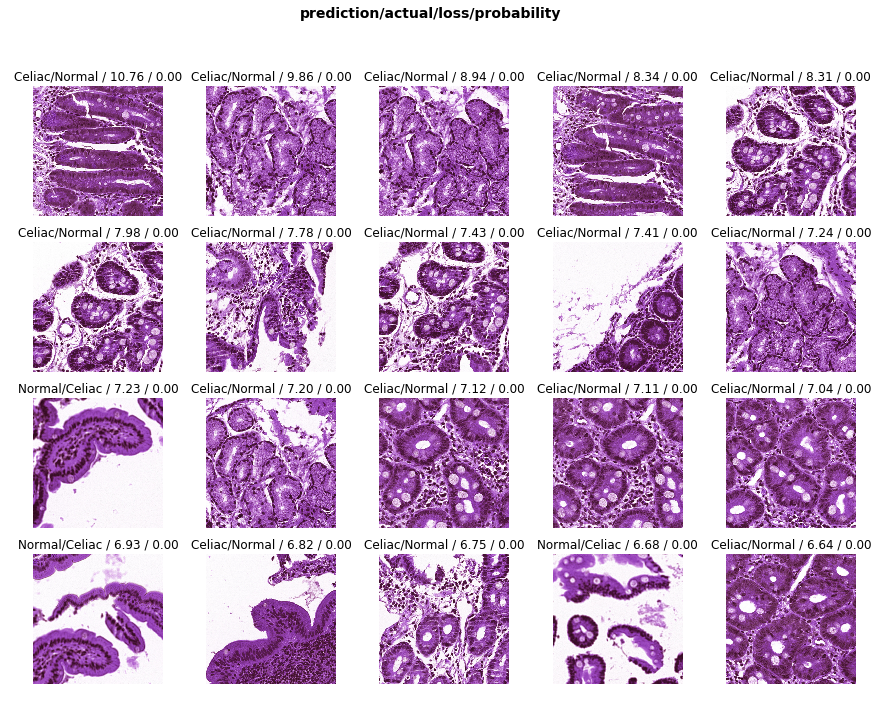

In [22]:
interp.plot_top_losses(20, figsize=(15,11))

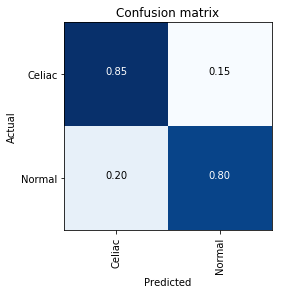

In [12]:
interp.plot_confusion_matrix(normalize=True)

In [ ]:
learn.save('512_4epoch')